# First Attempt
batch size 64, lr 1e-3

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module

## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSelu'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 10000
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 64, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.939s 


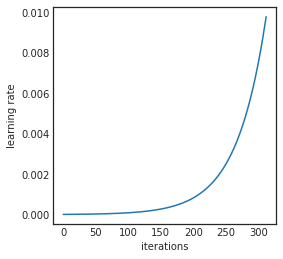

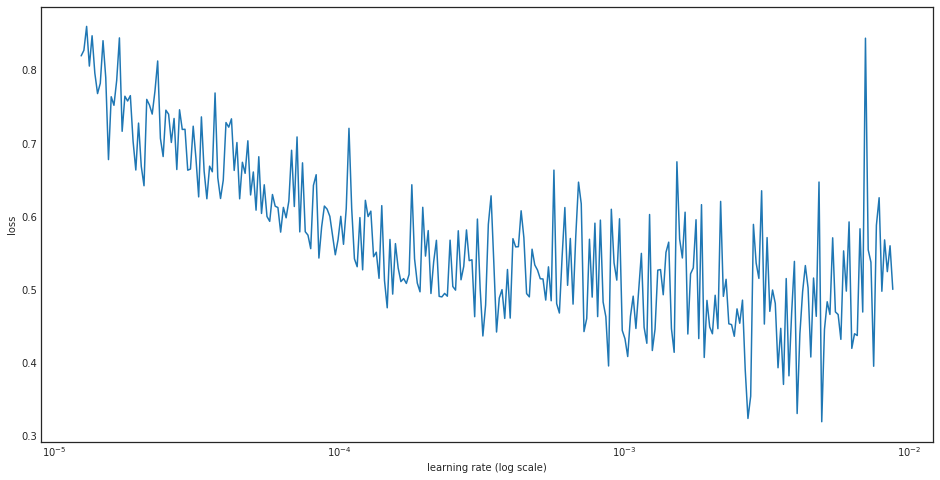

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=False, verbose=0)

In [6]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.422214736027
2 New best found: 0.399006769813
3 New best found: 0.390845379769
4 New best found: 0.385899381176
5 New best found: 0.382868028211
6 New best found: 0.381360203957
7 New best found: 0.380004567799
8 New best found: 0.377882998506
9 New best found: 0.376502351764
10 New best found: 0.374052562431
12 New best found: 0.373385066664
14 New best found: 0.372118507439
15 New best found: 0.370524909723
18 New best found: 0.370097512419
19 New best found: 0.369569430103
21 New best found: 0.369373440334
22 New best found: 0.368353781583
23 New best found: 0.368315325836
25 New best found: 0.367848117254
26 New best found: 0.367783653493
27 New best found: 0.367568956638
30 New best found: 0.365982377804
40 New best found: 0.365855077139
41 New best found: 0.365079602601
50 New best found: 0.364722638375
51 New best found: 0.364718856215
55 New best found: 0.363382291687
59 New 

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107165). Check your callbacks.
  % delta_t_median)


1 New best found: 0.411149289355
2 New best found: 0.392259960602
3 New best found: 0.387493930939
4 New best found: 0.384654986384
5 New best found: 0.381608207125
6 New best found: 0.378949905772
7 New best found: 0.377961999216
8 New best found: 0.376585672103
9 New best found: 0.374827624852
11 New best found: 0.374447766301
12 New best found: 0.373914501331
13 New best found: 0.373239698755
14 New best found: 0.371827748852
17 New best found: 0.370348719239
19 New best found: 0.369491630583
20 New best found: 0.369060664281
23 New best found: 0.368123036465
24 New best found: 0.367532335225
28 New best found: 0.366907935656
35 New best found: 0.366032637825
36 New best found: 0.365031320129
45 New best found: 0.364737137634
47 New best found: 0.364132935022
Early stopping after 57 epochs
Score is: {'loss': 0.3641329350221793, 'AUC': 0.09470971593141442, 'wAUC': 0.07452496221526772}
Fold took 100.061s

Running fold 5 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125709). Check your callbacks.
  % delta_t_median)


1 New best found: 0.426077221697
2 New best found: 0.396385922175
3 New best found: 0.389104862292
4 New best found: 0.385958487821
5 New best found: 0.381247840425
6 New best found: 0.379956200824
7 New best found: 0.377605104006
8 New best found: 0.377353477371
9 New best found: 0.376305070356
10 New best found: 0.374646667597
12 New best found: 0.373619767243
13 New best found: 0.373076713431
14 New best found: 0.370489418701
18 New best found: 0.369923616472
19 New best found: 0.369826694079
21 New best found: 0.369512855161
23 New best found: 0.36922191685
25 New best found: 0.368061748058
28 New best found: 0.367652084931
32 New best found: 0.367114636697
35 New best found: 0.36690877611
37 New best found: 0.366515875567
38 New best found: 0.365580889103
47 New best found: 0.365074661658
55 New best found: 0.364975606583
56 New best found: 0.363707998087
62 New best found: 0.363410842906
65 New best found: 0.36312243692
66 New best found: 0.363049229136
Early stopping after 76 ep

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181115). Check your callbacks.
  % delta_t_median)


1 New best found: 0.418514145791
2 New best found: 0.390405306276
3 New best found: 0.382799342333
4 New best found: 0.37916438291
5 New best found: 0.375995427888
6 New best found: 0.372932229952
7 New best found: 0.371341382293
8 New best found: 0.370412204831
9 New best found: 0.368498163869
10 New best found: 0.367978881088
11 New best found: 0.367084442539
12 New best found: 0.366544160591
14 New best found: 0.366471862049
15 New best found: 0.365029263967
17 New best found: 0.363778940034
18 New best found: 0.3637775418
19 New best found: 0.363655733906
20 New best found: 0.363068407906
24 New best found: 0.361978503715
27 New best found: 0.361140606013
29 New best found: 0.361130208952
32 New best found: 0.361042865892
33 New best found: 0.360308380656
41 New best found: 0.360039577739
42 New best found: 0.3592604128
45 New best found: 0.358962042481
51 New best found: 0.35711205706
60 New best found: 0.35696590214
63 New best found: 0.356885066061
68 New best found: 0.356504868

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190812). Check your callbacks.
  % delta_t_median)


1 New best found: 0.419228126058
2 New best found: 0.397830264124
3 New best found: 0.390547064759
4 New best found: 0.386192403141
5 New best found: 0.38366400902
6 New best found: 0.381447409074
7 New best found: 0.37947427993
8 New best found: 0.378391511594
9 New best found: 0.376964258419
10 New best found: 0.375184451043
15 New best found: 0.37354309291
16 New best found: 0.37185972839
17 New best found: 0.371679040201
21 New best found: 0.371391622387
23 New best found: 0.371252979751
25 New best found: 0.369547995486
27 New best found: 0.369128803794
34 New best found: 0.368189875651
36 New best found: 0.367410257162
43 New best found: 0.367296303192
44 New best found: 0.367247531818
45 New best found: 0.367038579953
49 New best found: 0.36612800192
51 New best found: 0.366095589806
53 New best found: 0.365624581183
61 New best found: 0.365458262848
62 New best found: 0.365144961138
70 New best found: 0.364897782088
71 New best found: 0.363927283825
80 New best found: 0.3638833

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195621). Check your callbacks.
  % delta_t_median)


1 New best found: 0.423969567618
2 New best found: 0.397839019954
3 New best found: 0.39150408449
4 New best found: 0.387256904461
5 New best found: 0.383329742036
6 New best found: 0.382447840333
7 New best found: 0.381802652321
8 New best found: 0.37981466248
9 New best found: 0.379661855126
10 New best found: 0.379559000484
11 New best found: 0.377200838223
12 New best found: 0.376003771018
14 New best found: 0.375949984918
16 New best found: 0.373589230446
20 New best found: 0.371848929947
24 New best found: 0.370732160902
26 New best found: 0.37019303771
Early stopping after 36 epochs
Score is: {'loss': 0.37019303770966705, 'AUC': 0.09785195711467565, 'wAUC': 0.07161371475326905}
Fold took 67.335s

Running fold 9 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216674). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108674). Check your callbacks.
  % delta_t_median)


1 New best found: 0.423256138768
2 New best found: 0.403184292632
3 New best found: 0.394982317675
4 New best found: 0.390356603969
5 New best found: 0.386261634262
6 New best found: 0.382209252209
8 New best found: 0.379259846572
9 New best found: 0.378583804942
10 New best found: 0.377882302959
11 New best found: 0.377305909922
12 New best found: 0.37622853046
14 New best found: 0.375394446401
17 New best found: 0.373240799509
19 New best found: 0.372908032567
20 New best found: 0.372752408429
22 New best found: 0.37265403991
23 New best found: 0.371852460485
26 New best found: 0.371240486715
28 New best found: 0.370619952745
29 New best found: 0.370583252141
30 New best found: 0.369829072265
35 New best found: 0.369782576447
39 New best found: 0.369134473815
41 New best found: 0.368705751273
42 New best found: 0.368027263263
47 New best found: 0.367520980634
48 New best found: 0.367394521226
50 New best found: 0.367175022063
60 New best found: 0.366461965205
62 New best found: 0.366

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.276852). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138766). Check your callbacks.
  % delta_t_median)


1 New best found: 0.437054599691
2 New best found: 0.403627453904
3 New best found: 0.397183622568
4 New best found: 0.391890420943
5 New best found: 0.389538235557
6 New best found: 0.386656336591
7 New best found: 0.385927564586
9 New best found: 0.385023059415
10 New best found: 0.382880690836
12 New best found: 0.38197759357
13 New best found: 0.380740598891
14 New best found: 0.38028208605
18 New best found: 0.379883008384
21 New best found: 0.378917551807
22 New best found: 0.377207116871
31 New best found: 0.376583943652
33 New best found: 0.376368487415
42 New best found: 0.376194226039
43 New best found: 0.375136773785
48 New best found: 0.374720649401
50 New best found: 0.374444465154
51 New best found: 0.373350046534
Early stopping after 61 epochs
Score is: {'loss': 0.37335004653385206, 'AUC': 0.09987809368325173, 'wAUC': 0.07342752584626022}
Fold took 114.616s


______________________________________
Training finished
Cross-validation took 1402.230s 


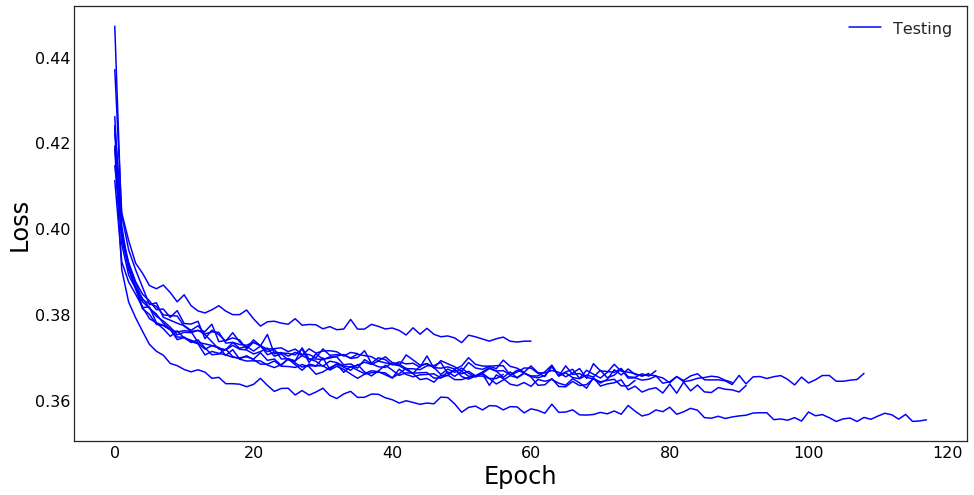

Mean wAUC = 0.0707 +- 0.0008
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, useCosAnneal=True, trainOnWeights=False, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [ ]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [ ]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

## Response on development data

In [ ]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

In [ ]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

## Response on val data

In [ ]:
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

In [ ]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', testData), getFeature('pred', testData)),
                                                           roc_auc_score(getFeature('targets', testData), getFeature('pred', testData), sample_weight=getFeature('weights', testData)))

## Evaluation

### Import in dataframe

In [ ]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'gen_sample', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['gen_sample'] = getFeature('gen_sample', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [ ]:
devData = convertToDF(trainData)
valData = convertToDF(testData)

In [ ]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### ROC curve

In [ ]:
rocPlot(inData=[devData, valData],
        params=[{'linestyle':'dashed', 'color':'b'}, {'color':'b'}],
        labels=['Train', 'Test'], weightName='gen_weight')

### MVA distributions

In [ ]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [ ]:
getSamplePredPlot(valData)

## Save classified data

In [ ]:
name = dirLoc + signal + "_" + channel + "_" + varSet + '_' + classModel + '_classifiedData.csv'
print "Saving data to", name
valData.to_csv(name, columns=['gen_target', 'gen_weight', 'gen_sample', 'pred_class'])

## Save/load

In [ ]:
name = "weights/DNN_" + signal + "_" + channel + "_" + varSet + '_' + classModel
print name

### Save

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

### Load

In [ ]:
ensemble, weights, compileArgs, inputPipe, outputPipe = loadEnsemble(name)